In [3]:
# Importando as bibliotecas.  

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/advertising.csv')         # Aqui você colocará o diretório do arquivo. O arquivo esta disponível
display(df)                                  # na subpasta 'DATA'.

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()          # Aqui vemos que a base de dados está limpa e que não precisará de limpeza.        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:>

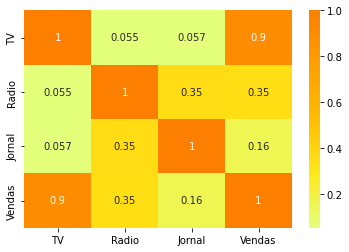

In [7]:
sns.heatmap(df.corr(),cmap= "Wistia", annot=True)      # Gráfico para análisar correlação, aqui vemos que a variável
                                                       # TV é a que tem a melhor relação linear com a variável vendas,
                                                       # e o jornal é a menor relação.          

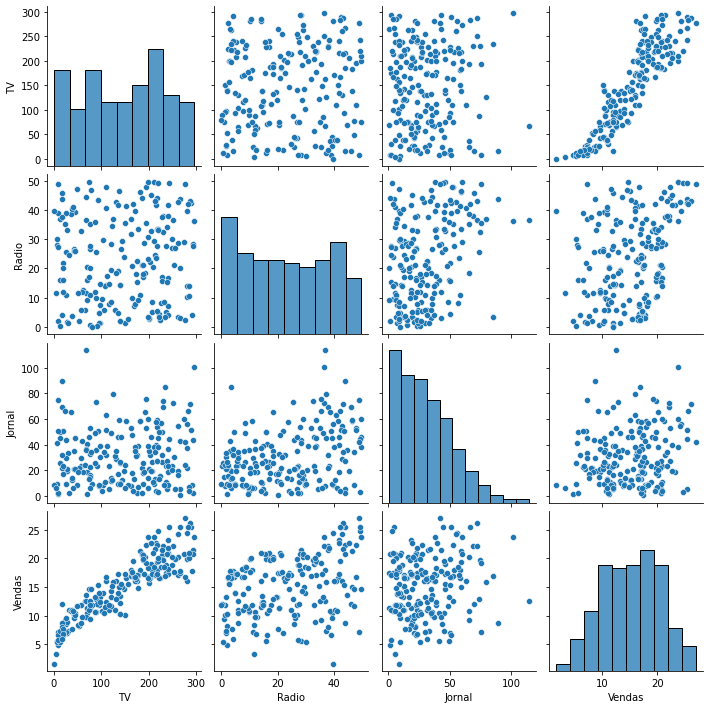

In [8]:
sns.pairplot(df)                        # Para vermos de outra visão, aqui é outro gráfico de correlação.       

In [ ]:
# Importando a biblioteca sklearn para começarmos a etapa de Machine Learning.           

from sklearn.model_selection import train_test_split

df_x = df.drop('Vendas', axis=1)             # Aqui estamos separando nossa tabela, para treinar a Inteligência artificial(IA). 
df_y = df['Vendas']                          # na variável 'df_x' receberá apenas nossos campos de investimento e       
                                             # a variável 'df_y' apenas o faturamento.  
    
    
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=1)

In [ ]:
# O camando 'tran_test_split' acima está separando nossos registros.

# Ele está armazenando na variável 'x_train' 70% de nosso registros da variável 'df_x' e o mesmo 
# com a variável 'y_train', porém usando os registros da variável 'df_y'.       

# Já os 30% dos registros que restam vão para as variáveis de teste ('x_test' e 'y_test'), que será usado para testarmos 
# a precisão da nossa inteligência artificial.       

In [10]:
# Importando funcões específicas da biblioteca sklearn para treinar e testar a IA.       

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

ln_reg = LinearRegression()                     # Iremos ultilizar dois métodos distintos (Regressão linear e a Random Forest Regressor)  
rf_reg = RandomForestRegressor()                # para treinar a IA, assim vamos comparar a precisão das duas 
                                                # e ultilizar apenas a mais precisa. 
    
ln_reg.fit(x_train, y_train)                    # Com o código ao lado já treinamos nossa IA com 70% dos registros de           
rf_reg.fit(x_train, y_train)                    # nossa tabela que foram armazenadas nas variáveis 'x_train' e 'Y_train'.      

test_pred_ln = ln_reg.predict(x_test)           # E Aqui ao lado já testamos testando com os 30% dos registros    
test_pred_rf = rf_reg.predict(x_test)           # de nossa tabela que foram armazenadas nas variáveis 'x_test' e 'Y_test'
                                                # E armazendo as respostas nas variáveis 'test_pred_ln' e 'test_pred_rf'.

In [11]:
# Importando a função metrics que nos permite ver a precisão de nossos testes com bons indicadores.     

from sklearn import metrics

r2_ln = metrics.r2_score(y_test, test_pred_ln)                             # Aqui estamos usando os indicadores R2 e RSME para
rsme_ln = np.sqrt(metrics.mean_squared_error(y_test, test_pred_ln))        # testarmos a precisão, usando como comparativo    
                                                                           # as respostas da IA e nossos registros da variável 
r2_rf = metrics.r2_score(y_test, test_pred_rf)                             # 'y_test' como gabarito.
rsme_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))

print(r2_rf, r2_ln)
print(rsme_rf, rsme_ln)

0.9655777619022119 0.9071151423684273
0.9373067089627966 1.5396947656031235


In [ ]:
# Acima vemos as precisões. Sabendo que entre 0 e 1, quando mais próximo de 1 o resultado mais preciso é. 
# Então usaremos o Machine Learning baseado na Random Forest Regressor.           

In [12]:
# Usaremos apenas o ML baseado em random forest, pois foi o mais preciso.

df_resultado = pd.DataFrame()
df_resultado['y_teste'] = y_test
df_resultado['y_rf'] = test_pred_rf     
                                    
# Aqui veremos no dataframe abaixo as respostas da IA(y_rf) e o gabarito(y_test).        
    
display(df_resultado)

,y_teste,y_rf
58,23.8,23.046
40,16.6,18.110
34,11.9,12.397
102,19.8,17.918
184,17.6,20.348
198,25.5,25.108
95,16.9,16.871
4,17.9,16.813
29,10.5,10.976
168,17.1,18.341


In [13]:
df_resultado= df_resultado.reset_index(drop=True)        # Apenas retirando o index bagunçado por motivos de organização.      

<AxesSubplot:>

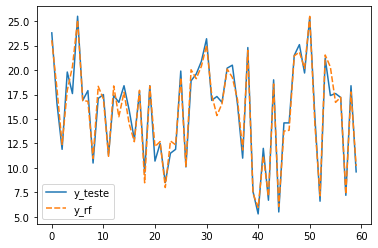

In [14]:
sns.lineplot(data=df_resultado)                          # Gráfico que representa dataframe acima.     
                                                         # Mostrando o quão preciso foi a IA.     

<AxesSubplot:ylabel='0'>

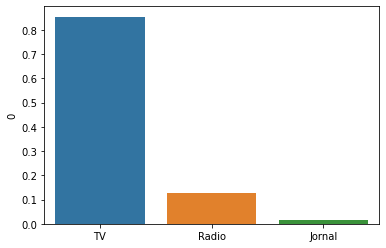

In [15]:
importancia = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)                 
sns.barplot(x=importancia.index, y=importancia[0])

In [16]:
print(df[['Radio','Jornal']].sum())          # Aqui mostra o quanto foi investido para cada tipo de marketing.  

Radio     4652.8
Jornal    6110.8
dtype: float64


In [ ]:
# OBS:
# - Os investimentos com a TV são os que trazem mais lucros.
# - A empresa esta investindo com jornal mais do que na rádio,
#  sendo que a rádio tem maior correlação com as vendas do que o jornal.

In [ ]:
# Para usar a IA criada use a função :

# rf_reg.predict( usando 3 parâmetros de investimento, como na nossa tabela ) 